In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import warnings 
warnings.filterwarnings("ignore")


In [2]:
data = fetch_california_housing()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["price"]=data.target

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0.5, 1.0, 'Distribution of MedInc')

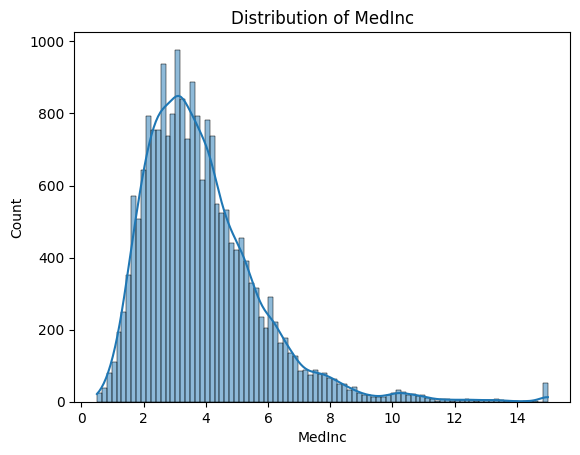

In [10]:
sns.histplot(df,x="MedInc",kde=True)
plt.title("Distribution of MedInc")

<Axes: >

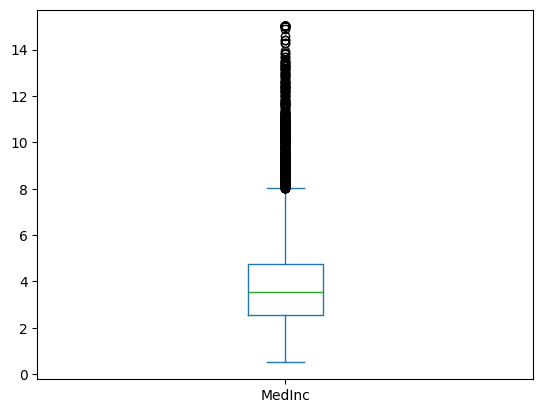

In [11]:
df.MedInc.plot.box()

In "MedInc" coloumn there are so many outlires.so we have to remove it.

In [12]:
df["MedInc"].quantile(0.97)

8.160844999999997

In [13]:
df=df[df["MedInc"]<=8]

In [14]:
df.shape

(19950, 9)

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,19950.000000,19950.000000,19950.000000,19950.000000,19950.000000,19950.000000,19950.000000,19950.000000,19950.000000
mean,3.655334,28.666316,5.348714,1.098589,1431.616541,3.012151,35.643317,-119.567398,1.980783
std,1.485947,12.536713,2.465613,0.480971,1132.957922,5.864746,2.144815,2.004903,1.063499
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.536575,18.000000,4.410806,1.006920,792.000000,2.424814,33.930000,-121.770000,1.176000
50%,3.467750,29.000000,5.176783,1.049734,1171.000000,2.816946,34.260000,-118.500000,1.750000
75%,4.591300,37.000000,5.956681,1.100463,1732.000000,3.289306,37.720000,-118.010000,2.532750
max,8.000000,52.000000,141.909091,34.066667,35682.000000,599.714286,41.950000,-114.310000,5.000010


<Axes: >

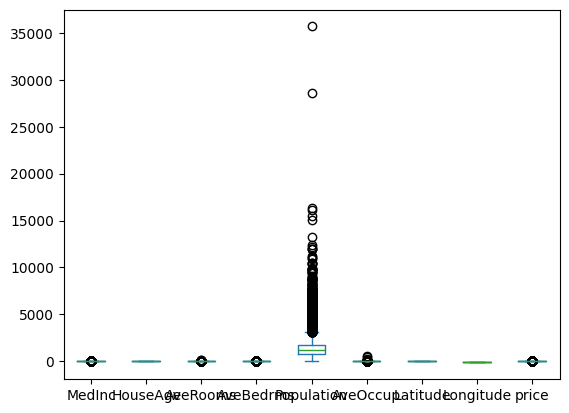

In [16]:
df.plot.box()

<Axes: >

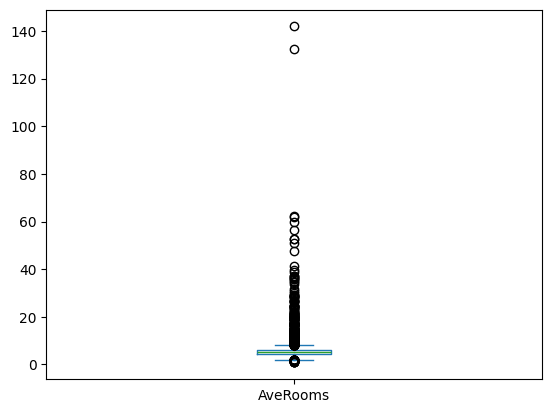

In [17]:
df["AveRooms"].plot.box()

In [18]:
df["AveRooms"].quantile([0.01,0.9,0.95,0.97,0.99])

0.01     2.570124
0.90     6.720412
0.95     7.279711
0.97     7.742959
0.99    10.297160
Name: AveRooms, dtype: float64

<Axes: >

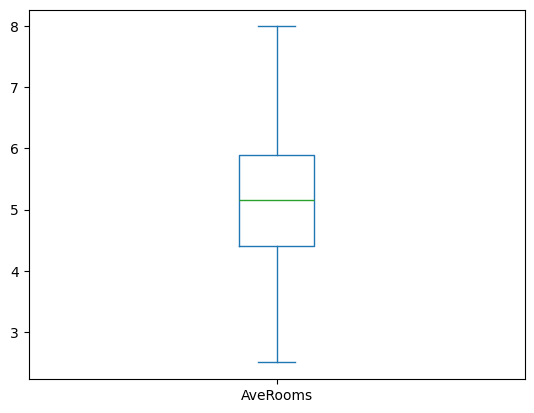

In [19]:
df[(df["AveRooms"]>=2.5)&(df["AveRooms"]<=8)]["AveRooms"].plot.box()

In [20]:
df=df[(df["AveRooms"]>=2.5)&(df["AveRooms"]<=8)]

<Axes: >

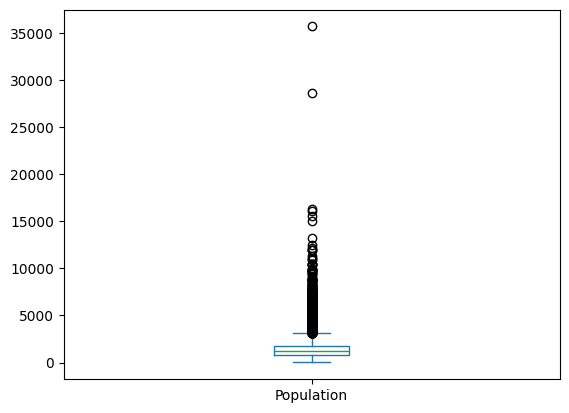

In [21]:
df["Population"].plot.box()

In [22]:
df["Population"].quantile(0.9)

2576.5999999999985

<Axes: >

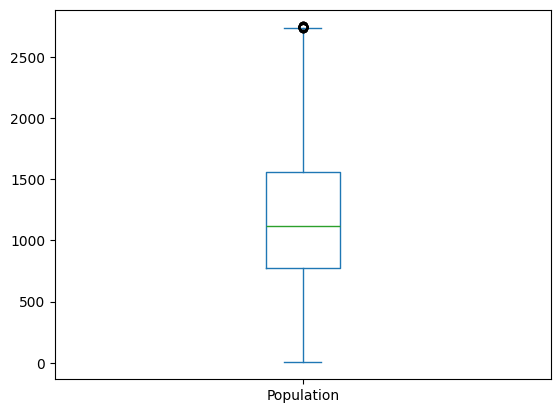

In [23]:
df[df["Population"]<2750]["Population"].plot.box()

In [24]:
df = df[df["Population"]<2750]

In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,17693.000000,17693.000000,17693.000000,17693.000000,17693.000000,17693.000000,17693.000000,17693.000000,17693.000000
mean,3.638183,29.784152,5.177101,1.061952,1196.420562,2.910121,35.675844,-119.621889,1.980008
std,1.466352,12.243047,1.045717,0.111966,575.877934,1.003067,2.150190,2.005468,1.076331
min,0.499900,1.000000,2.500000,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.531300,20.000000,4.427646,1.003356,776.000000,2.410714,33.940000,-121.820000,1.149000
50%,3.456100,30.000000,5.155660,1.047170,1117.000000,2.796923,34.290000,-118.570000,1.750000
75%,4.565600,38.000000,5.891403,1.096970,1561.000000,3.264184,37.730000,-118.040000,2.542000
max,8.000000,52.000000,7.995495,3.099338,2749.000000,63.750000,41.950000,-114.550000,5.000010


<Axes: >

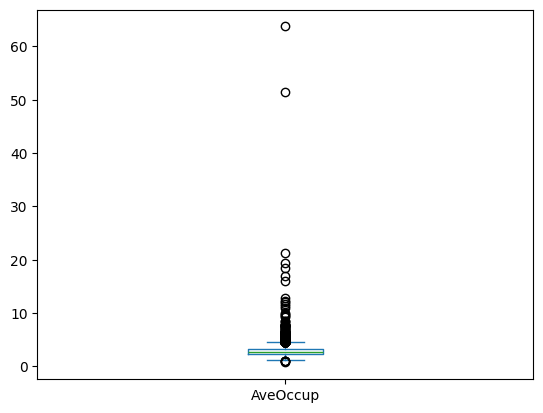

In [26]:
df["AveOccup"].plot.box()

In [28]:
df["AveOccup"].quantile(0.9)

3.8588556948519606

<Axes: >

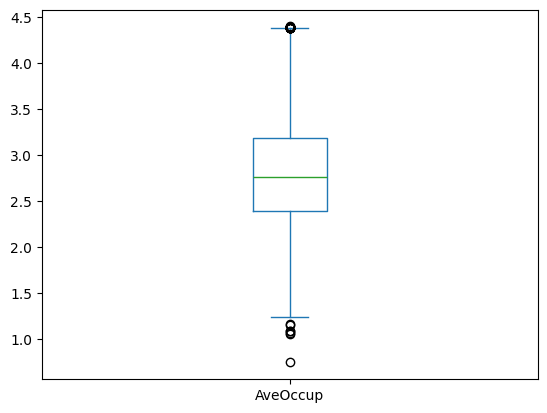

In [27]:
df[df["AveOccup"]<4.4]["AveOccup"].plot.box()

In [29]:
df=df[df["AveOccup"]<4.4]

In [30]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414


In [31]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000,16977.000000
mean,3.672054,29.692879,5.209433,1.062257,1188.483065,2.808583,35.719314,-119.660681,2.005484
std,1.471255,12.320059,1.038880,0.111652,571.725390,0.610636,2.163403,2.017184,1.084861
min,0.499900,1.000000,2.500000,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.558800,19.000000,4.473088,1.003356,772.000000,2.393082,33.940000,-121.860000,1.161000
50%,3.503900,30.000000,5.189744,1.047325,1106.000000,2.764846,34.430000,-118.850000,1.793000
75%,4.612500,38.000000,5.923969,1.096862,1546.000000,3.187500,37.750000,-118.040000,2.583000
max,8.000000,52.000000,7.995495,3.099338,2749.000000,4.399209,41.950000,-114.550000,5.000010


 we remove all outlires from data and we cleaned the data.now we can create a model.

In [1]:
from sklearn.preprocessing  import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X = scaler.fit_transform(df.drop("price",axis=1))

In [37]:
X

array([[ 1.33974304,  1.81068764,  0.58518428, ..., -0.42684175,
         0.98490605, -1.28366868],
       [ 0.1183689 ,  1.81068764,  1.03231503, ..., -1.02701699,
         0.98490605, -1.28366868],
       [ 0.24792197,  1.81068764, -0.4310296 , ..., -1.09509684,
         0.98490605, -1.28366868],
       ...,
       [-1.34042857, -1.03029154, -0.00374483, ..., -0.79091547,
         1.71525853, -0.77304071],
       [-1.22678076, -0.9491207 ,  0.11558924, ..., -1.12242521,
         1.71525853, -0.82261625],
       [-0.87237902, -1.11146237,  0.04359046, ..., -0.3137827 ,
         1.68752363, -0.78295582]])

In [38]:
y=df.price

In [39]:
y

3        3.413
4        3.422
5        2.697
6        2.992
7        2.414
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 16977, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,train_size=0.8,random_state=234)

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
model= DecisionTreeRegressor()

In [45]:
model.fit(X_tr,y_tr)


DecisionTreeRegressor()

In [46]:
model.score(X_tr,y_tr)

1.0

In [47]:
y_pred = model.predict(X_te)

In [48]:
r2_score(y_te,y_pred)

0.544276219073911

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],
    "max_features":list(range(2,8)),
    "min_samples_split":[2,3,4,5,6],
}


In [51]:
dtr=DecisionTreeRegressor()

In [52]:
gscv = GridSearchCV(dtr,param_grid = params,n_jobs=-1,cv=10,verbose=1)

In [53]:
gscv.fit(X_tr,y_tr)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=1)

In [54]:
gscv.best_params_

{'max_depth': 10, 'max_features': 4, 'min_samples_split': 6}

In [55]:
model2 =DecisionTreeRegressor(max_depth=10,max_features=4,min_samples_split=6)

In [56]:
model2.fit(X_tr,y_tr)

DecisionTreeRegressor(max_depth=10, max_features=4, min_samples_split=6)

In [57]:
y_pred2=model2.predict(X_te)

In [64]:
R2=r2_score(y_te,y_pred2)

In [65]:
r2_score(y_te,y_pred2)

0.6474562543500512

In [66]:
n=len(X_te)

In [67]:
n

3396

In [68]:
n,k=X_te.shape[0],X_te.shape[1]

In [69]:
n,k

(3396, 8)

In [70]:
adj_R2 = 1-(((1-R2)*(n-1))/(n-k-1))

In [71]:
adj_R2

0.6466235558070339

In [72]:
R2

0.6474562543500512